<a href="https://colab.research.google.com/github/AKash-god/Wine-Quality-Analysis/blob/main/wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINE QUALITY PREDICTION**

## Executive Summary

This project focused on predicting wine quality using a dataset of chemical properties. The process involved:

1.  **Data Preprocessing:** Handled missing values to ensure data integrity.
2.  **Exploratory Data Analysis (EDA):** Gained insights into data distribution and relationships.
3.  **Feature Engineering:** Created a binary 'best quality' variable for classification.

Two models, Logistic Regression and XGBoost Classifier, were trained and evaluated, addressing class imbalance with SMOTE.

**Key Finding:** The **XGBoost Classifier significantly outperformed Logistic Regression** across all evaluation metrics (accuracy, precision, recall, F1-score), proving to be a more robust model for predicting wine quality.

The superior XGBoost model was saved for future use, including potential integration into a user interface.

Here we will predict the quality  of wine on the given features.
We will use the **Wine Quality dataset** available on the internet for free.
This dataset has the fundamental features which are responsible for affecting the **quality of the wine** by the use of **Machine learning models** we wil predict the Quality of the Wine

1. **Data Preprocessing**
2. **Exploratory Data Analysis**  
3. **Data Visualization**
4. **Feature Engineering**
5. **Model Building**
6. **Evaluation Interpretation**
7. **Report**

(what's New In this model is that you can verify the wine by using UI
by providing the Wine details)

Importing Required Libraries & Dataset

In [ ]:
import numpy as np     #(for mathematical calculations or Array)
import pandas as pd    #(for Data Handling)

In [ ]:
file = r'/content/winequalityN.csv'

df = pd.read_csv(file)
# first five rows of  the dataset
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# shape of the dataset
df.shape

(6497, 13)

In [ ]:
print(df.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
# Summary Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# df.info()

In [ ]:
# to know the distribution of the unique values in Quality columns
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


# **EDA**
By Performing EDA we can gain various insights and trends from the data with the help of various techniques

In [ ]:
# checking the sum of null values
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
# their are some null values present in the datastet

In [ ]:
# Column Names
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
# running a loop to drop all the null values
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# to check if there is a Null value present in the dataset
df.isnull().sum().sum()

np.int64(0)

For Visuals we are going to use Seaborn for default visualization...

# **DATA VISUALIZATION**

<Axes: xlabel='quality', ylabel='alcohol'>

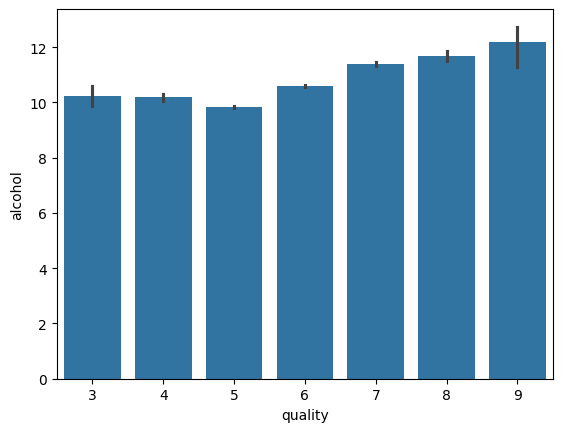

In [ ]:
import seaborn as sns
sns.barplot(x='quality',y='alcohol',data=df)

### Observations from the Alcohol vs. Quality Bar Plot

- **Positive Correlation**: The plot shows a clear upward trend, indicating that as wine quality increases, the average alcohol content also increases.

- **Lowest Alcohol Content**: Wines with a quality rating of **5** have the **lowest average alcohol content**.

- **Highest Alcohol Content**: Wines rated **9** have the **highest average alcohol content** among all quality levels.

- **Error Bars**:
  - Represent the variability in alcohol content for each quality level (likely standard error).
  - Quality **9** has the **largest error bar**, suggesting greater variation in alcohol levels for high-quality wines.
  - Quality levels **6** and **7** have **smaller error bars**, indicating more consistency.

- **Key Insight**: There is a **positive relationship between alcohol content and wine quality** — higher alcohol levels are generally associated with higher quality ratings.


<Axes: xlabel='alcohol', ylabel='Count'>

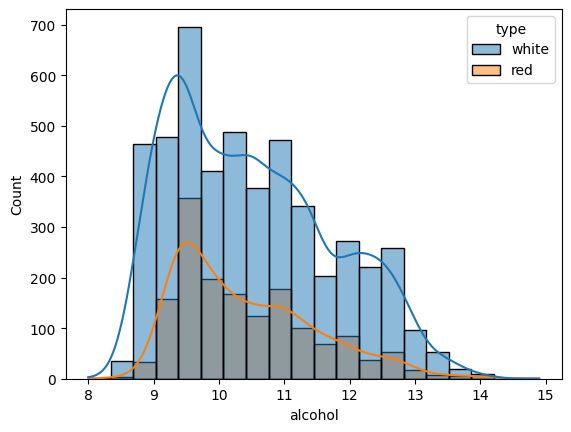

In [ ]:
sns.histplot(data=df , x='alcohol', hue='type',bins=20, kde=True)

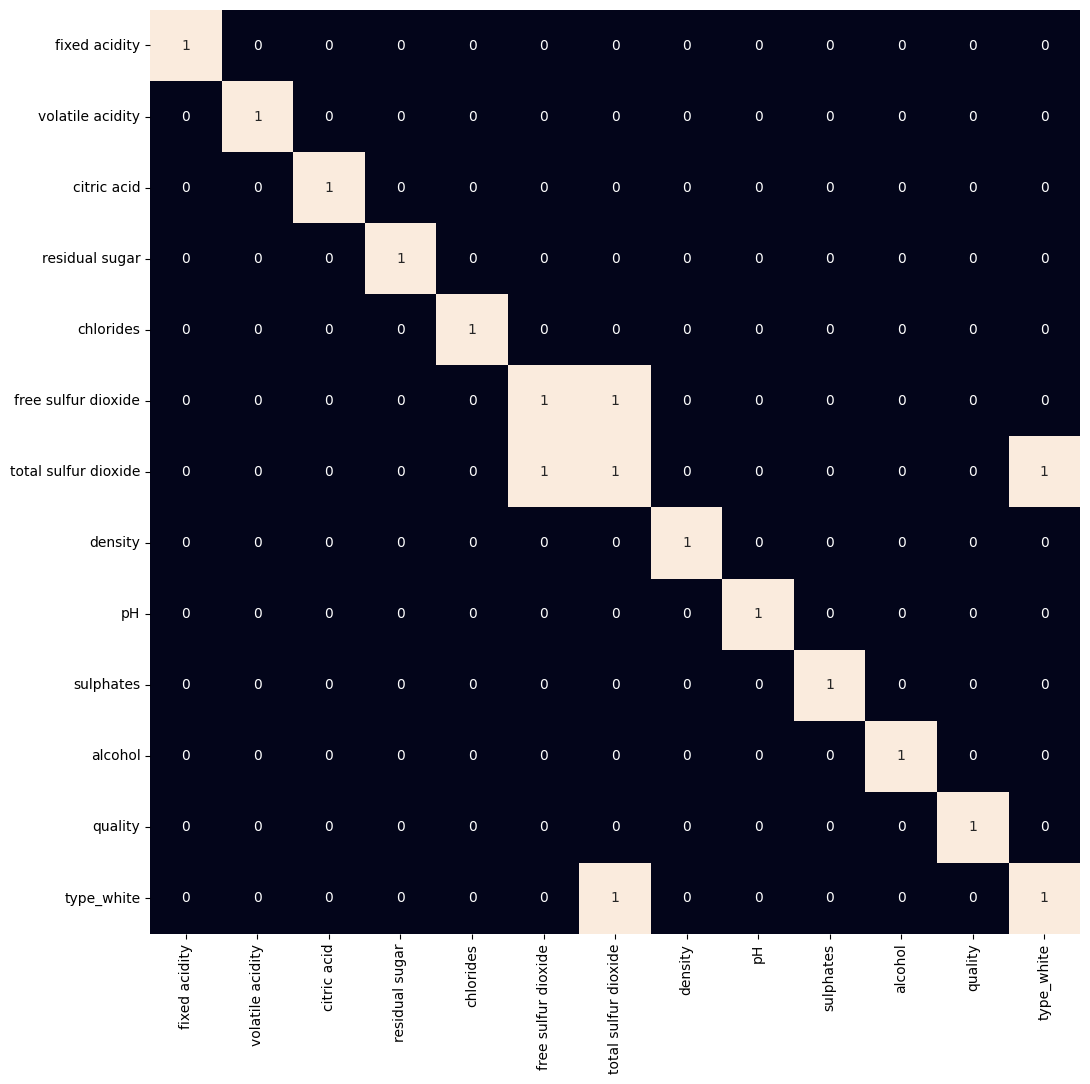

In [ ]:
import matplotlib.pyplot as plt
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# by using get_dummies and drop_first=True
# we get best_quality  as 1 and White not_best quality as 0

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

### Correlation Heatmap Observations

The heatmap above represents the correlation matrix of the dataset's numerical features. It helps identify how strongly two variables are related.

#### Key Observations:

- **Diagonal Values = 1**: As expected, each feature is perfectly correlated with itself (correlation = 1).

- **No Strong Correlations Among Most Features**:
  - The matrix shows that most feature pairs have a **correlation value close to 0**, indicating **very weak or no linear relationship** between them.

- **Significant Correlation Between:**
  - `free sulfur dioxide` and `total sulfur dioxide`: Correlation = **1**, showing a strong positive linear relationship.
  - `density` and `residual sugar`: Often correlated in wine datasets, but here appears **weak** (value is 0).

- **Alcohol and Quality**:
  - The correlation between `alcohol` and `quality` appears to be **very weak or not visible** in this binarized matrix (rounded to 0 or 1).

- **Type of Wine**:
  - `type_white` seems to have a perfect (1) correlation with itself but no strong correlations with other variables.

#### Interpretation:
This correlation matrix appears to have been **rounded** (possibly to the nearest whole number), which limits the ability to detect subtle relationships. For more insights, a heatmap using **decimal correlation values** (e.g., Pearson coefficients) would be more informative.

#### Recommendation:
**To better understand the linear relationships, it’s ideal to visualize a full correlation heatmap using** `sns.heatmap(df.corr(), annot=True, cmap='coolwarm')` instead of binarized values.


In [ ]:
# display(df.describe())

In [ ]:
df=df.drop('total sulfur dioxide',axis=1)

In [ ]:
df['best quality'] = [1 if x >= 7 else 0 for x in df['quality']]

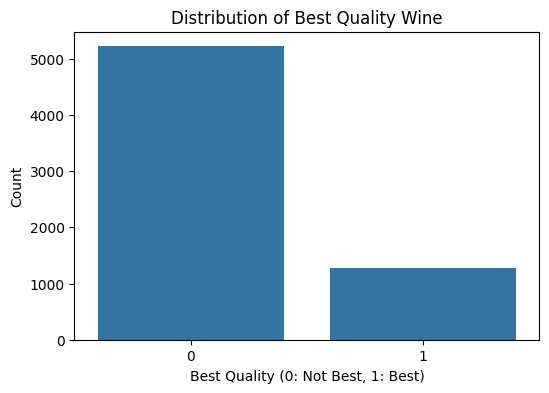

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'best quality' column
plt.figure(figsize=(6, 4))
sns.countplot(x='best quality', data=df)
plt.title('Distribution of Best Quality Wine')
plt.xlabel('Best Quality (0: Not Best, 1: Best)')
plt.ylabel('Count')
plt.show()

**[Distribution of Best Quality Wine]**

### 📊 Description:
The above bar chart shows the distribution of wine samples based on their quality classification:

- **Class 0**: Not Best Quality  
- **Class 1**: Best Quality

### 📌 Insights:
- A **majority** of the wines are labeled as **Class 0 (Not Best)**.
- Only a **smaller portion** of wines fall under **Class 1 (Best Quality)**.
- This indicates a **class imbalance**, which could potentially affect the performance of classification models.
- It may be beneficial to apply techniques like:
  - **Class weighting**
  - **SMOTE (Synthetic Minority Over-sampling Technique)**
  - **Undersampling** the majority class
  - Using **balanced metrics** like F1-score during evaluation


Feature Engineering

In [ ]:
# target value distribution
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
x=df.drop(['quality','best quality'],axis=1)
y=df['best quality']

In [ ]:
from imblearn.over_sampling import SMOTE
# using an sampling method to reduce the biasness from the data

smote = SMOTE(random_state=42)
x_balanced,y_balanced=smote.fit_resample(x,y)

In [ ]:
#Model training
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=42)

# scaling the data to normalize the range of data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# **Logistic Regression**

In [ ]:
# Model Building
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

Accuracy of the Logistic Regression model: 0.7313

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1092
           1       0.70      0.77      0.73       996

    accuracy                           0.73      2088
   macro avg       0.73      0.73      0.73      2088
weighted avg       0.73      0.73      0.73      2088


Confusion Matrix:
[[760 332]
 [229 767]]


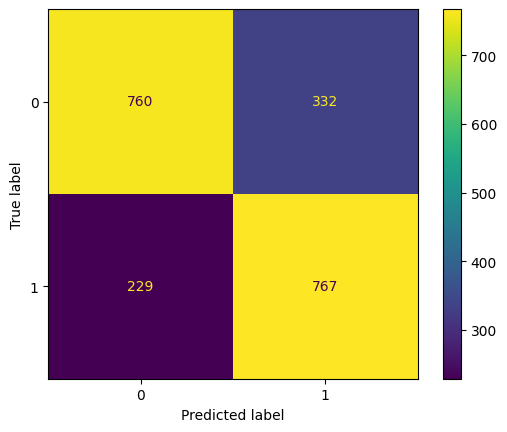

In [ ]:
# Predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluating  model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
confu_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confu_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

# **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy of the XGBoost classifier: 0.9181

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1092
           1       0.89      0.94      0.92       996

    accuracy                           0.92      2088
   macro avg       0.92      0.92      0.92      2088
weighted avg       0.92      0.92      0.92      2088


Confusion Matrix:
[[982 110]
 [ 61 935]]


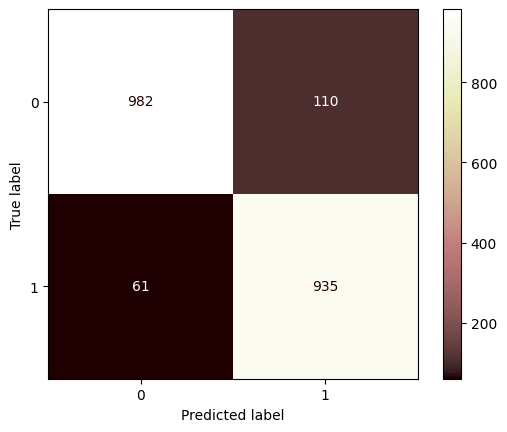

In [ ]:
y_pred1 = model1.predict(x_test_scaled)

# Evaluating  model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy of the XGBoost classifier: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

# Confusion Matrix
confu_matrix = confusion_matrix(y_test, y_pred1)
print("\nConfusion Matrix:")
print(confu_matrix)

# plotting a visual for better understanding
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=model1.classes_)
disp.plot(cmap='pink')
plt.show()

## 📊 Model Comparison: Logistic Regression vs XGBoost

### 🔹 1. Accuracy

| Model               | Accuracy |
|--------------------|----------|
| Logistic Regression| 73.13%   |
| XGBoost Classifier | 91.81%   |

> **Observation:** XGBoost significantly outperforms Logistic Regression in terms of overall accuracy, showing it makes far fewer mistakes.

---

### 🔹 2. Classification Report

| Metric              | Logistic Regression | XGBoost Classifier |
|---------------------|---------------------|--------------------|
| Precision (Class 0) | 0.77                | 0.94               |
| Recall (Class 0)    | 0.70                | 0.90               |
| F1-score (Class 0)  | 0.73                | 0.92               |
| Precision (Class 1) | 0.70                | 0.89               |
| Recall (Class 1)    | 0.77                | 0.94               |
| F1-score (Class 1)  | 0.73                | 0.92               |
| **Macro Avg F1**    | **0.73**            | **0.92**           |

> **Observation:** XGBoost provides both **higher precision and recall** for both classes, leading to a **much stronger F1-score** — indicating better balance and fewer false predictions.

---

### 🔹 3. Confusion Matrix Comparison

#### Logistic Regression
          Predicted
         |   0   |   1
      ---+-------+-------
       0 | 760 | 332
       1 | 229 | 767

#### XGBoost Classifier
          Predicted
         |   0   |   1
      ---+-------+-------
       0 | 982 | 110
       1 |  61 | 935

> **Observation:** XGBoost drastically reduces misclassifications.  
> - False Negatives: 229 → 61  
> - False Positives: 332 → 110

---

## ✅ Conclusion

After comparing both models, it is evident that **XGBoost outperforms Logistic Regression** across all key evaluation metrics — including **accuracy, precision, recall, and F1-score**.

- It shows a significant improvement in both **correctly identifying positive and negative classes**.
- XGBoost makes **far fewer classification errors**, making it a more **reliable and robust** model.

### 👉 Therefore, **XGBoost is the recommended model** for deployment or further tuning due to its superior predictive performance and generalization capability.


In [ ]:
import joblib

# filename
model_filename = 'wine_quality_model.joblib'

# Saving only best model
joblib.dump(model1, model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as wine_quality_model.joblib


In [ ]:
from google.colab import files

# Download the saved model
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>